**Name** : Ayush Chaware

**Roll no.** :    22

**Section** : A-1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/tennis.csv")

## Data Analysis

In [ ]:
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
df.shape

(14, 5)

In [ ]:
df.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


## Preparing the Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
outlook=LabelEncoder ()
temp=LabelEncoder ()
humidity=LabelEncoder ()
windy=LabelEncoder ()
play=LabelEncoder ()

In [ ]:
df['outlook']=outlook.fit_transform(df['outlook'])
df['temp']=outlook.fit_transform(df['temp'])
df['humidity']=outlook.fit_transform(df['humidity'])
df['windy']=outlook.fit_transform(df['windy'])
df['play']=outlook.fit_transform(df['play'])

In [ ]:
df.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [ ]:
feature_col = ['outlook','temp','humidity','windy']
X = df[feature_col]
Y = df.play

In [ ]:
X

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [ ]:
Y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)


## Training and Making Predictions

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 100)

In [ ]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0]


In [ ]:
x_test

,outlook,temp,humidity,windy
10,2,2,1,1
13,1,2,0,1
7,2,2,0,0


In [ ]:
y_test

10    1
13    0
7     0
Name: play, dtype: int64

In [ ]:
classifier.score(x_test,y_test)

0.6666666666666666

In [ ]:
# Model Accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy",metrics.accuracy_score(y_test, y_pred))

Accuracy 0.6666666666666666


## Evaulating The Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Vizualizing Descision Tree

[Text(0.5, 0.875, 'x[0] <= 1.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.25, 0.625, 'x[3] <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.375, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.625, 'x[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

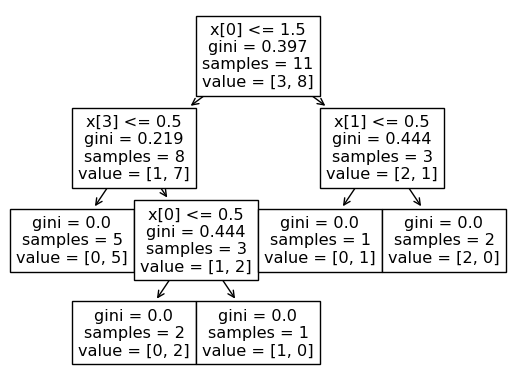

In [ ]:
from sklearn import tree
tree.plot_tree(classifier)